<a href="https://colab.research.google.com/github/trongtin2001/BAITAP_AI/blob/main/Robot3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from skimage import color
from keras.callbacks import EarlyStopping


In [ ]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 


In [ ]:
import csv
import math as m
l1 = 50
l2 = 40
l3 = 20
with open('Robot3b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','tt3','Px','Py','T'])

  for tt1 in range(-150,151,1):
    for tt2 in range(-120,121,1):
      for tt3 in range(-90,91,1): 
        Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)+ l3*m.cos(tt1+tt2+tt3)
        Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)+ l3*m.sin(tt1+tt2+tt3)
        T = tt1+tt2+tt3
        writer.writerow([tt1,tt2,tt3,Px,Py,T])


In [ ]:
data=pd.read_csv('Robot3b.csv')
data

,tt1,tt2,tt3,Px,Py,T
0,-150,-120,-90,68.663997,23.607345,-360
1,-150,-120,-89,87.410234,27.649215,-359
2,-150,-120,-88,94.137753,45.607463,-358
3,-150,-120,-87,82.661303,60.971357,-357
4,-150,-120,-86,63.532280,59.615405,-356
...,...,...,...,...,...,...
13129916,150,120,86,63.532280,-59.615405,356
13129917,150,120,87,82.661303,-60.971357,357
13129918,150,120,88,94.137753,-45.607463,358
13129919,150,120,89,87.410234,-27.649215,359


In [ ]:
x=data.drop(data.columns[:3],axis=1)
y=data.drop(data.columns[3:],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)


In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 500)               256500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 439,251
Trainable params: 439,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=4,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))


Epoch 1/4
76934/76934 [==============================] - 1174s 15ms/step - loss: -6968618934937321472.0000 - accuracy: 0.4570 - val_loss: -42416686897458839552.0000 - val_accuracy: 0.4568
Epoch 2/4
76934/76934 [==============================] - 1265s 16ms/step - loss: nan - accuracy: 0.4377 - val_loss: nan - val_accuracy: 0.3831
Epoch 3/4
76934/76934 [==============================] - 1238s 16ms/step - loss: nan - accuracy: 0.3827 - val_loss: nan - val_accuracy: 0.3831
Epoch 4/4
76934/76934 [==============================] - 1311s 17ms/step - loss: nan - accuracy: 0.3827 - val_loss: nan - val_accuracy: 0.3831


In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])

Sai so kiem tra la: nan
Do chinh xac kiem tra la: 0.3830547630786896


In [ ]:
model.save('Robot3b.h5')
from tensorflow.keras.models import load_model
model = load_model('Robot3b.h5')

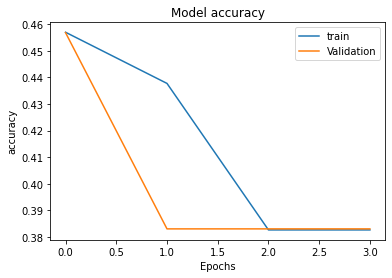

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()